# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [2]:
# carregando os pacotes

import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf

In [4]:
# carregando a base de dados

tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [5]:
# criação da variável Gorjeta em porcentagem 

tips['tip_pct'] = tips['tip']/(tips['total_bill']-tips['tip'])

# criação da variável Conta Líquida

tips['net_bill'] = tips['total_bill'] - tips['tip']

tips


,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.256166,23.11
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.079428,25.18
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.096759,20.67
242,17.82,1.75,Male,No,Sat,Dinner,2,0.108899,16.07


In [22]:
# reproduzindo esta regressão

regressao = smf.ols('tip ~ net_bill', data = tips).fit()

regressao.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Thu, 30 Jun 2022   Prob (F-statistic):           5.02e-23
Time:                        09:20:47   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(0.0, 10.5)

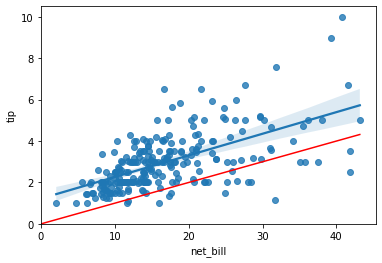

In [19]:
# Gráfico de Dispersão 

sns.regplot(y = 'tip', x = 'net_bill', data = tips[tips['tip_pct']<.5])

# Gerando dados para a linha dos 10%

x = np.linspace(0, tips['net_bill'].max(), 100)
y = 0.1*x

# plotando a linha dos 10%

plt.plot(x, y, '-r', label = 'linha dos 10%')

#Opções estética para explicitar o ponto (0,0) no gráfico

plt.xlim(left = 0)
plt.ylim(bottom = 0)

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

In [24]:
# modelo de regressão de tip_pcf por net_bill 

regressao1 = smf.ols('tip_pct ~ net_bill', data = tips).fit()
regressao1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Thu, 30 Jun 2022   Prob (F-statistic):           1.52e-06
Time:                        09:27:54   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.000       0.260       0.351
net_bill      -0.0061      0.001     -4.931      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      468.674   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234437.604
Skew:                          11.104   Prob(JB):                         0.00
Kurtosis:                     153.221   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/tmp/ipykernel_9571/1059693218.py:4: RuntimeWarning: invalid value encountered in true_divide
  y = .1*(x/x)


(0.0, 0.505398619388979)

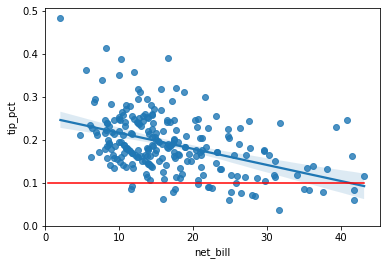

In [52]:
sns.regplot(y = 'tip_pct', x = 'net_bill', data = tips[tips['tip_pct']<.5])

x = np.linspace(0, tips['net_bill'].max(), 100)
y = .1*(x/x)

plt.plot(x, y,'-r')

plt.xlim(left = 0)
plt.ylim(bottom = 0)



### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

O primeiro gráfico traz a relação fatura (conta) liquida e o valor da gorjeta. Note-se que ambas as retas (azul e vermelho) são crescentes e que a reta azul está acima da reta vermeha (de 10%), o que demonstra que a maioria das gorjetas dadas ultrapassam os 10% da fatura liquida.

Já no segundo gráfico, que traz a relação Porcentagem Gorjeta e o valor da fatura liquida, verificamos que quanto menor o valor da fatura, maior é a percentagem da gorjeta, e que na medida em que a fatura vai aumentando, a percentagem da gorjeta vai diminuindo, por isso que a reta azul é descrescente.

Não podemos comparar diretamente os R² das dois gráficos porque os gráficos estão com métricas diferentes, enquanto no primeiro gráfico estamos comparando o valor da fatura liquida com a gorjeta, ambos em valores, no segundo gráfico estamos trabalhando com a gorjeta em porcentagem e a fatura liquida em valor, o que causa certa disparidade. Tanto é verdade que este é o motivo da reta de 10% em vermelho ser horizontal, pois independentemente do valor da fatura liquida, o que se espera é uma percentagem de 10%. Isto, também justifica o R² do segundo gráfico ser menor (baixo coeficiente de determinação).

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [53]:
dados_novos = tips[0:5]
dados_novos

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [55]:
regressao1.predict(dados_novos)

0    0.207087
1    0.251951
2    0.197684
3    0.180107
4    0.176358
dtype: float64

In [56]:
regressao1.fittedvalues

0      0.207087
1      0.251951
2      0.197684
3      0.180107
4      0.176358
         ...   
239    0.163268
240    0.150546
241    0.178264
242    0.206534
243    0.208316
Length: 244, dtype: float64

In [61]:
#Regressão e valor predito para tip como tip_pct*net_bill

regressao3 = smf.ols('tip ~ tip_pct*net_bill', data = tips).fit()
regressao3.fittedvalues


0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Length: 244, dtype: float64

In [62]:
regressao3.rsquared

1.0

In [63]:
regressao1.rsquared

0.09129084920662967

No item 1 (predição para tip_pct), o R² é de 0,091, enquanto que o R² do modelo tip (como tip_pct * net_bill) é 1.0. Isto demonstra que o modelo tip_pct não é o mais adequado para fazer predição, visto o coeficiente de determinação ser muito baixo, o que demonstra maior chances de erro. Enquanto isso, o modelo tip (como tip_pct * net_bill) por ser igual a 1,0, demonstra o acerto de 100%, ou seja, os todos os valores preditos estariam sobre a reta azul do gráfico. 